In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_epochs = 100
batch_size = 100
learning_rate = 1e-3

In [3]:
train_dataset = dsets.MNIST(root='data/', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)
test_dataset = dsets.MNIST(root='data/', 
                           train=False, 
                           transform=transforms.ToTensor())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [5]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [7]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

In [8]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, 28*28))
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        
        if((i+1) % 100 == 0):
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

C:\Users\mohit_tare\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if sys.path[0] == '':


Epoch [1/100], Step [100/600], Loss: 0.0644
Epoch [1/100], Step [200/600], Loss: 0.0602
Epoch [1/100], Step [300/600], Loss: 0.0496
Epoch [1/100], Step [400/600], Loss: 0.0537
Epoch [1/100], Step [500/600], Loss: 0.0550
Epoch [1/100], Step [600/600], Loss: 0.0515
Epoch [2/100], Step [100/600], Loss: 0.0474
Epoch [2/100], Step [200/600], Loss: 0.0463
Epoch [2/100], Step [300/600], Loss: 0.0462
Epoch [2/100], Step [400/600], Loss: 0.0422
Epoch [2/100], Step [500/600], Loss: 0.0461
Epoch [2/100], Step [600/600], Loss: 0.0396
Epoch [3/100], Step [100/600], Loss: 0.0470
Epoch [3/100], Step [200/600], Loss: 0.0424
Epoch [3/100], Step [300/600], Loss: 0.0408
Epoch [3/100], Step [400/600], Loss: 0.0407
Epoch [3/100], Step [500/600], Loss: 0.0387
Epoch [3/100], Step [600/600], Loss: 0.0432
Epoch [4/100], Step [100/600], Loss: 0.0389
Epoch [4/100], Step [200/600], Loss: 0.0391
Epoch [4/100], Step [300/600], Loss: 0.0405
Epoch [4/100], Step [400/600], Loss: 0.0360
Epoch [4/100], Step [500/600], L

Epoch [31/100], Step [400/600], Loss: 0.0367
Epoch [31/100], Step [500/600], Loss: 0.0327
Epoch [31/100], Step [600/600], Loss: 0.0329
Epoch [32/100], Step [100/600], Loss: 0.0365
Epoch [32/100], Step [200/600], Loss: 0.0346
Epoch [32/100], Step [300/600], Loss: 0.0331
Epoch [32/100], Step [400/600], Loss: 0.0325
Epoch [32/100], Step [500/600], Loss: 0.0327
Epoch [32/100], Step [600/600], Loss: 0.0349
Epoch [33/100], Step [100/600], Loss: 0.0343
Epoch [33/100], Step [200/600], Loss: 0.0333
Epoch [33/100], Step [300/600], Loss: 0.0342
Epoch [33/100], Step [400/600], Loss: 0.0317
Epoch [33/100], Step [500/600], Loss: 0.0349
Epoch [33/100], Step [600/600], Loss: 0.0327
Epoch [34/100], Step [100/600], Loss: 0.0296
Epoch [34/100], Step [200/600], Loss: 0.0319
Epoch [34/100], Step [300/600], Loss: 0.0339
Epoch [34/100], Step [400/600], Loss: 0.0308
Epoch [34/100], Step [500/600], Loss: 0.0349
Epoch [34/100], Step [600/600], Loss: 0.0348
Epoch [35/100], Step [100/600], Loss: 0.0330
Epoch [35/

Epoch [61/100], Step [600/600], Loss: 0.0291
Epoch [62/100], Step [100/600], Loss: 0.0311
Epoch [62/100], Step [200/600], Loss: 0.0339
Epoch [62/100], Step [300/600], Loss: 0.0318
Epoch [62/100], Step [400/600], Loss: 0.0343
Epoch [62/100], Step [500/600], Loss: 0.0305
Epoch [62/100], Step [600/600], Loss: 0.0320
Epoch [63/100], Step [100/600], Loss: 0.0337
Epoch [63/100], Step [200/600], Loss: 0.0335
Epoch [63/100], Step [300/600], Loss: 0.0339
Epoch [63/100], Step [400/600], Loss: 0.0321
Epoch [63/100], Step [500/600], Loss: 0.0312
Epoch [63/100], Step [600/600], Loss: 0.0341
Epoch [64/100], Step [100/600], Loss: 0.0319
Epoch [64/100], Step [200/600], Loss: 0.0317
Epoch [64/100], Step [300/600], Loss: 0.0322
Epoch [64/100], Step [400/600], Loss: 0.0310
Epoch [64/100], Step [500/600], Loss: 0.0303
Epoch [64/100], Step [600/600], Loss: 0.0286
Epoch [65/100], Step [100/600], Loss: 0.0302
Epoch [65/100], Step [200/600], Loss: 0.0325
Epoch [65/100], Step [300/600], Loss: 0.0330
Epoch [65/

Epoch [92/100], Step [200/600], Loss: 0.0295
Epoch [92/100], Step [300/600], Loss: 0.0322
Epoch [92/100], Step [400/600], Loss: 0.0318
Epoch [92/100], Step [500/600], Loss: 0.0303
Epoch [92/100], Step [600/600], Loss: 0.0324
Epoch [93/100], Step [100/600], Loss: 0.0302
Epoch [93/100], Step [200/600], Loss: 0.0296
Epoch [93/100], Step [300/600], Loss: 0.0316
Epoch [93/100], Step [400/600], Loss: 0.0341
Epoch [93/100], Step [500/600], Loss: 0.0303
Epoch [93/100], Step [600/600], Loss: 0.0290
Epoch [94/100], Step [100/600], Loss: 0.0314
Epoch [94/100], Step [200/600], Loss: 0.0311
Epoch [94/100], Step [300/600], Loss: 0.0295
Epoch [94/100], Step [400/600], Loss: 0.0320
Epoch [94/100], Step [500/600], Loss: 0.0326
Epoch [94/100], Step [600/600], Loss: 0.0321
Epoch [95/100], Step [100/600], Loss: 0.0315
Epoch [95/100], Step [200/600], Loss: 0.0332
Epoch [95/100], Step [300/600], Loss: 0.0317
Epoch [95/100], Step [400/600], Loss: 0.0294
Epoch [95/100], Step [500/600], Loss: 0.0327
Epoch [95/

In [9]:
test_images,_ = next(iter(test_loader))

In [10]:
test_output = model(test_images.view(-1,28*28))

In [11]:
test_output = test_output.view(100,28,28)

In [12]:
def validate_op(n_images,orig_images,decoded_images,image_width):
    fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    plt.grid(False)
    plt.ylabel("Decoded (Bottom)   |   Original(Top)")
    orig_images = orig_images[:n_images]
    decoded_images = decoded_images[:n_images]
    
    
    for i in range(n_images):
        for ax, img in zip(axes, [orig_images, decoded_images]):
            ax[i].imshow(img[i].detach().reshape((image_width, image_width)),cmap = 'gray')

C:\Users\mohit_tare\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


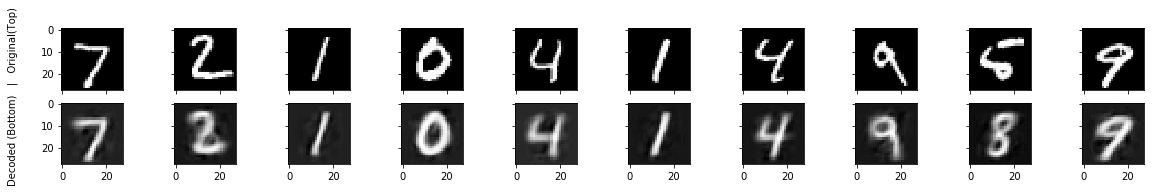

In [14]:
validate_op(10,test_images,test_output,28)